# System Setting

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/Shared drives/INF560/new_feature_extraction_data"

os.chdir(path)
os.listdir(path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['brazil_reviews.txt',
 'word2vec_model_trained_on_yelp_review100.w2v',
 'word2vec_model_trained_on_yelp_review50.w2v',
 'word2vec_model_trained_on_yelp_review150.w2v',
 'word2vec_model_trained_on_yelp_review200.w2v',
 'word2vec_model_trained_on_yelp_review250.w2v',
 'word2vec_model_trained_on_yelp_review300.w2v',
 'word2vec_model_trained_on_yelp_review125.w2v',
 'word2vec_model_trained_on_yelp_review175.w2v',
 'word2vec_model_trained_on_yelp_review225.w2v',
 'reviews.csv',
 'Copy of word2vec_model_trained_on_yelp_review50.w2v',
 'clean_reviews.csv',
 'tf_idf_values.csv',
 'features.csv',
 'top_words_feature.csv',
 'ratings.csv',
 'new_ratings.csv',
 'new_ratings.gsheet',
 'ratings_w2v.gsheet',
 'ratings_w2v.csv',
 'lr-level-tf-50.joblib',
 'svm.joblib',
 'svm_whole_50_old.joblib',
 'lr.joblib',
 'svm_whole_100_old.joblib',
 'lr_whole_50_old.joblib',
 'svm_whole50_100_old.joblib',
 'svm_feature50_newwhole100.joblib',
 'svm_feature50_newwhole100_42.joblib',
 'svm_feature50_newwhole100_2

In [0]:
!pip install nltk

In [0]:
import numpy as np
import pandas as pd 
import nltk
import re

# Data Preprocess

**Review Data Pre-Process**

In [0]:
filename = "reviews.csv"
outputfile = "clean_reviews.csv"

In [0]:
raw = pd.read_csv(filename)

In [0]:
raw.head()

restaurants                                            reviews
0    A Saideira   "If you haven't been to the international air...
1   Ben&Jerry's   Very organized, easy access to terminals, par...
2         Bob's   Shop without surprises in terms of speed, qua...
3   Burger King   "Even more disgusting than mc Donald's though...
4  Cafe Suplicy   I do not like place that the same person to d...

Clean and split sentences into words

In [0]:
def clean_text(df):
    text = str(df["reviews"])
    text = text.lower()
    text = re.sub("[^a-z\s]", "", text)
    return text

In [0]:
cleaned = raw
cleaned["reviews"] = cleaned.apply(clean_text, axis=1)

In [0]:
cleaned.head()

restaurants                                            reviews
0    A Saideira   if you havent been to the international airpo...
1   Ben&Jerry's   very organized easy access to terminals parki...
2         Bob's   shop without surprises in terms of speed qual...
3   Burger King   even more disgusting than mc donalds though p...
4  Cafe Suplicy   i do not like place that the same person to d...

Eliminate stop words and do the stemming


In [0]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stopWords = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
def reduce_stop_words(df):
  text = str(df["reviews"])
  new_text = " "
  for w in text.split():
    if w not in stopWords:
      new_text = new_text+" "+stemmer.stem(w)
  return new_text

In [0]:
cleaned["reviews"] = cleaned.apply(reduce_stop_words,axis = 1)
cleaned.head

<bound method NDFrame.head of                 restaurants                                            reviews
0                A Saideira    havent intern airport rio de janeiro lot dif...
1               Ben&Jerry's    organ easi access termin park alway space li...
2                     Bob's    shop without surpris term speed qualiti pric...
3               Burger King    even disgust mc donald though probabl littl ...
4              Cafe Suplicy    like place person everyth cashier serveprepa...
5              Cafe Palheta    live outsid rio love come palheta coffe famo...
6     Casa do Pão de Queijo    fairli basic snack food dont consid place ge...
7     Doog Original Hot Dog    locat airport galeo rj delight especi brazuc...
8   Delírio Tropical Galeão    place gig serv anyth like fresh lettuc dont ...
9         Empório da Empada    like product visit plan go back meet new opt...
10               Demoiselle    terribl weak food bad environ hate eat fan l...
11       Galeão Coffee

In [0]:
cleaned["review_size"] = cleaned["reviews"].str.count(" ")
cleaned["review_size"].describe()

count     36.000000
mean     629.555556
std      100.262639
min      485.000000
25%      568.000000
50%      597.000000
75%      660.000000
max      969.000000
Name: review_size, dtype: float64

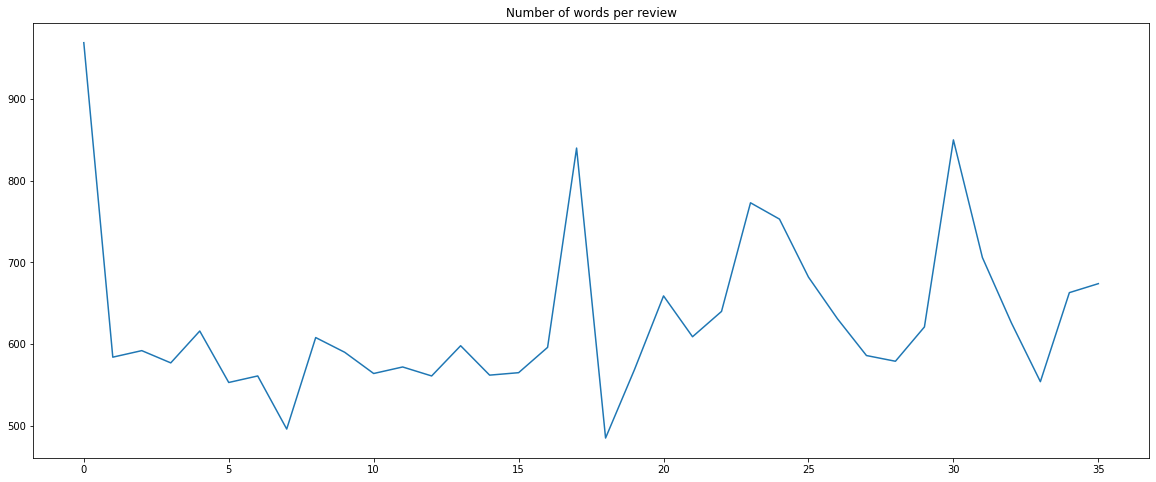

In [0]:
cleaned["review_size"].plot(title="Number of words per review", figsize=(20, 8))

In [0]:
del cleaned["review_size"]

Store the result

In [0]:
cleaned.to_csv(outputfile,index=False)

# Feature extraction(TF-IDF)

## Calculate TF-IDF matrix

In [0]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
reviews = pd.read_csv("clean_reviews.csv")
reviews.head

<bound method NDFrame.head of                 restaurants                                            reviews
0                A Saideira    havent intern airport rio de janeiro lot dif...
1               Ben&Jerry's    organ easi access termin park alway space li...
2                     Bob's    shop without surpris term speed qualiti pric...
3               Burger King    even disgust mc donald though probabl littl ...
4              Cafe Suplicy    like place person everyth cashier serveprepa...
5              Cafe Palheta    live outsid rio love come palheta coffe famo...
6     Casa do Pão de Queijo    fairli basic snack food dont consid place ge...
7     Doog Original Hot Dog    locat airport galeo rj delight especi brazuc...
8   Delírio Tropical Galeão    place gig serv anyth like fresh lettuc dont ...
9         Empório da Empada    like product visit plan go back meet new opt...
10               Demoiselle    terribl weak food bad environ hate eat fan l...
11       Galeão Coffee

In [0]:
# parameters
# min number of times of term t has to occur in all sentences
min_df = 2
# Number of sentences in a training or testing corpus
n_d = len(reviews)
# maximum number of times of term t can occur in all the sentences which is calculated as max_df*n_d
max_df = 2 * n_d

In [0]:
vectorizer = CountVectorizer(stop_words = 'english',min_df=min_df,max_df = max_df)
X = vectorizer.fit_transform(reviews["reviews"])
word = vectorizer.get_feature_names()
totoal_word = len(word)
totoal_word
X.toarray()

1406

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
tf_idf_values = tfidf.toarray()
tf_idf_values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02226951, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03182941, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.07267656, 0.        ,
        0.        ],
       [0.        , 0.        , 0.03638014, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
values = pd.DataFrame(tf_idf_values)
values.to_csv("tf_idf_values.csv",index=False)

## Sort tf-idf value

Set TF-IDF value for each review's word and sort the words by their values




In [0]:
word_features = []
for i in range(len(tf_idf_values)):
    fe = []
    for j in range(len(word)):
        fe.append((word[j],tf_idf_values[i][j]))
    word_features.append(sorted(fe,key=lambda x:x[1],reverse = True))

In [0]:
feature_for_each_restaurants = pd.DataFrame()
keywords = []
for i in range(len(word_features)):
    k = ""
    for w in word_features[i]:
        if w[1]>0:
          k=k+" "+w[0]
            # k.append(w[0])
    keywords.append(k)
feature_for_each_restaurants["restaurant"] = reviews["restaurants"]
feature_for_each_restaurants["keyword"] = keywords
feature_for_each_restaurants.to_csv("features.csv",index=False)
feature_for_each_restaurants.head

<bound method NDFrame.head of                  restaurant                                            keyword
0                A Saideira   beer domest board congratul cart servic atten...
1               Ben&Jerry's   ice cream tast choos servic caramel flavor pa...
2                     Bob's   bob servic snack fast evalu good time sandwic...
3               Burger King   king burger cheddar snack ice good servic app...
4              Cafe Suplicy   coffe espresso good servic airport galeo cafe...
5              Cafe Palheta   coffe tijuca cornbread good servic bread love...
6     Casa do Pão de Queijo   chees bread accept card electron store mate c...
7     Doog Original Hot Dog   dog santo american hot dumont airport sauc sa...
8   Delírio Tropical Galeão   salad food good healthi protein price servic ...
9         Empório da Empada   beer good bar snack breakfast place servic en...
10               Demoiselle   buffet airport food restaur good option price...
11       Galeão Coffee

count     36.000000
mean     256.555556
std       36.047147
min      148.000000
25%      239.750000
50%      255.500000
75%      269.750000
max      340.000000
Name: keyword, dtype: float64

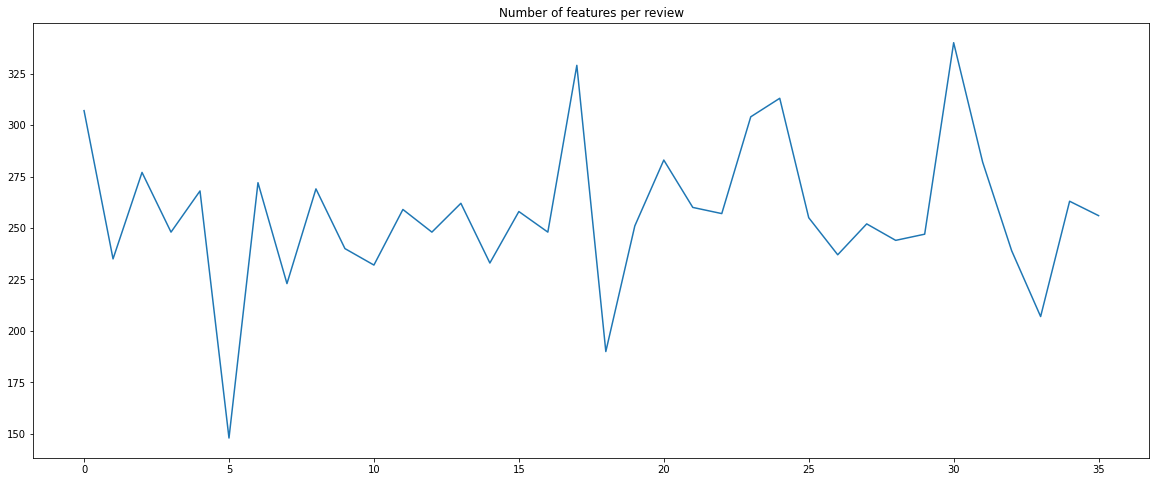

In [0]:
total_word_length = feature_for_each_restaurants["keyword"].str.count(" ")
total_word_length.describe()
total_word_length.plot(title="Number of features per review", figsize=(20, 8))

## Select features

In [0]:
amount = 148
retain_words = []
for w in feature_for_each_restaurants["keyword"]:
  retain_words.append(" ".join(w.split(" ")[:149]))
feature_for_each_restaurants["keyword"] = retain_words
feature_for_each_restaurants.to_csv("top_words_feature.csv",index=False)

In [0]:
feature_for_each_restaurants.head

<bound method NDFrame.head of                  restaurant                                            keyword
0                A Saideira   beer domest board congratul cart servic atten...
1               Ben&Jerry's   ice cream tast choos servic caramel flavor pa...
2                     Bob's   bob servic snack fast evalu good time sandwic...
3               Burger King   king burger cheddar snack ice good servic app...
4              Cafe Suplicy   coffe espresso good servic airport galeo cafe...
5              Cafe Palheta   coffe tijuca cornbread good servic bread love...
6     Casa do Pão de Queijo   chees bread accept card electron store mate c...
7     Doog Original Hot Dog   dog santo american hot dumont airport sauc sa...
8   Delírio Tropical Galeão   salad food good healthi protein price servic ...
9         Empório da Empada   beer good bar snack breakfast place servic en...
10               Demoiselle   buffet airport food restaur good option price...
11       Galeão Coffee

# Feature numberized(word2vec)

## Train word2vec model

In [0]:
import pandas as pd
# load the data into panda dataframe
data_file_name = "yelp_review.json"
chunks = pd.read_json(data_file_name,lines=True, chunksize=100000)
print("Data loaded")

# Convert all the review text into a long string and print its length
raw_corpus = ""
for chunk in chunks:
    raw_corpus = u"".join(chunk['text']+" ")
print("Raw Corpus contains {0:,} characters".format(len(raw_corpus)))

# import natural language toolkit
import nltk

# download the punkt tokenizer
nltk.download('punkt')
print("The punkt tokenizer is downloaded")

# Load the punkt tokenizer
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("The punkt tokenizer is loaded")

# we tokenize the raw string into raw sentences
raw_sentences = tokenizer.tokenize(raw_corpus)
print("We have {0:,} raw sentences".format(len(raw_sentences)))

import re

# Clean and split sentence into words
def clean_and_split_str(string):
    strip_special_chars = re.compile("[^A-Za-z]+")
    string = re.sub(strip_special_chars, " ", string)
    return string.strip().split()

# clean each raw sentences and build the list of sentences
sentences = []
for raw_sent in raw_sentences:
    if len(raw_sent) > 0:
        sentences.append(clean_and_split_str(raw_sent))

reviewsDF = pd.read_csv("clean_reviews.csv")
sentences.extend(reviewsDF["reviews"])
print("We have {0:,} clean sentences".format(len(sentences)))

token_count = sum([len(sentence) for sentence in sentences])
print("The dataset corpus contains {0:,} tokens".format(token_count))

import multiprocessing

# Dimensionality of the resulting word vectors
num_features = 225

# Minimum word count threshold
min_word_count = 3

# Number of threads to run in parallel
num_workers = multiprocessing.cpu_count()

# Context window length
context_size = 7

# Seed for the RNG, to make the result reproducible
seed = 1

import gensim

word2vec_model = gensim.models.word2vec.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size)

word2vec_model.build_vocab(sentences=sentences)
print("The vocabulary is built")
print("Word2Vec vocabulary length: ", word2vec_model.corpus_total_words)

# Start training the model
word2vec_model.train(sentences=sentences,total_examples=word2vec_model.corpus_count,epochs=word2vec_model.iter)
print("Training finished")

#Save the model
word2vec_model.save("word2vec_model_trained_on_yelp_review"+str(num_features)+".w2v")
print("Model saved")

Data loaded


ValueError: ignored

## Feature numberized

In [0]:
# Load our word2vec model
import gensim
num_features =300
c = 200
w2v_model = gensim.models.word2vec.Word2Vec.load("word2vec_model_trained_on_yelp_review"+str(num_features)+".w2v")
print("Model loaded")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model loaded



Method 1: Transfer features into vectors and each review document is an vector list, used for CNN



In [0]:
reviews = pd.read_csv("top_words_feature.csv")

In [0]:
w2v_for_each_restaurant = []
for ws in reviews["keyword"]:
    w2vs = []
    count = 0
    for w in ws.split(" "):
      if count >=c:
        break
      w2v = np.zeros(num_features,dtype=float)
      if w in w2v_model:
        w2v = w2v_model[w]
      count+=1
      w2vs.append(w2v)     
    w2v_for_each_restaurant.append(w2vs)
len(w2v_for_each_restaurant[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


149

Method 2: Transfer features into vectors and sum up those word vectors, each review is presented by an vector, used for SVM and Logistic regression



In [0]:
reviews = pd.read_csv("top_words_feature.csv")

In [0]:
w2v_for_each_restaurant = []
for ws in reviews["keyword"]:
    w2vs = np.zeros(num_features,dtype=float)
    count = 0
    for w in ws.split(" "):
      if count >=c:
        break
      if w in w2v_model:
        w2vs+= w2v_model[w]
      count+=1
    w2v_for_each_restaurant.append(w2vs)
w2v_for_each_restaurant[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


array([-1.05963926e+01,  7.61653744e+00, -3.01504907e-01,  1.44571853e+01,
       -8.94777662e+00,  3.61770542e+00, -5.02458135e+00,  1.21886730e+01,
       -2.87388678e+00,  1.45206208e+01, -8.83296059e+00, -1.71180045e+00,
        3.46857644e+00, -2.82609557e+00, -1.28812399e+01, -7.65337352e+00,
       -3.04532646e+00,  3.15272856e+00, -6.21389660e-01,  1.98126951e+01,
        6.55899565e+00,  2.14176103e+01, -1.81920747e+01, -1.82080475e+01,
       -1.04611514e+01,  2.13508134e+00,  1.63442044e-01,  8.37782543e-01,
        1.44331953e-01, -8.33731651e+00, -1.05383913e+01, -1.03345462e+01,
       -4.88802544e+00, -4.10138377e+00,  7.87005524e+00, -1.35945896e+01,
       -5.59061395e+00, -6.66599053e+00,  5.72852806e+00,  2.50663898e+00,
       -4.42580538e+00,  7.46522473e+00,  6.45360294e-01, -8.36273025e+00,
       -1.60955388e+00, -2.00038798e+00, -1.05867739e+01,  2.15414265e+01,
        6.65655114e-03,  1.95264779e+00,  1.59350126e+01,  4.62791331e+00,
       -5.17635633e+00, -

# Rating defined

## KNN

To rate those restaurant which can't get customer traffic from Kiana data

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.decomposition import PCA
import numpy as np

exist_rating = [1,1,1,3,5,1,1,1,5,5,3,5,5,1,5,5,5,3,3,3,5,5]
exist_index = [1,3,5,6,8,10,11,12,13,16,18,20,23,24,25,26,27,28,29,32,33,34]
# exist_rating = [1,1,3,5,1,1,1,5,5,3,5,1,5,5,5,5,3,3,3,5,5,1]
# exist_index = [2,4,5,7,9,10,11,12,15,17,19,21,22,24,25,26,27,28,31,32,33,35]
# exist_rating = [3,1,3,3,1,5,3,5,5,5,1]
# exist_index = [1,6,8,20,23,25,28,29,32,33,34]
exist_reviews = []
left_reviews = []
left_rating = []
values = pd.read_csv("tf_idf_values.csv")
for l in range(36):
    if l in exist_index:
      exist_reviews.append(values.iloc[l])
    else:
      left_reviews.append(values.iloc[l])
# pca = PCA(n_components=2)
# reduced_dimensional_values = pca.fit_transform(values)
# reduced_dimensional_values
# reviews = pd.read_csv("features.csv")
# whole = []
# for ws in reviews["keyword"]:
#     w2vs = np.zeros(num_features,dtype=float)
#     count = 0
#     for w in ws.split(" "):
#       count+=1
#       if w in w2v_model:
#         w2vs+= w2v_model[w]
#     whole.append(w2vs)

# reduced_dimensional_values = whole

# for l in range(36):
#     if l in exist_index:
#       exist_reviews.append(reduced_dimensional_values[l])
#     else:
#       left_reviews.append(reduced_dimensional_values[l])

exist_reviews = np.array(exist_reviews)
left_reviews = np.array(left_reviews)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(exist_reviews, exist_rating)
neigh

# neigh = RandomForestClassifier(max_depth=2, random_state=0)
# neigh.fit(exist_reviews, exist_rating)

left_rating = neigh.predict(left_reviews)
ratings = []
j=0
k=0
for i in range(36):
    if i in exist_index:
        ratings.append(exist_rating[j])
        j+=1
    else:
        ratings.append(left_rating[k])
        k+=1

ratings = pd.DataFrame(ratings)
ratings
ratings.to_csv("lratings_w2v.csv",index=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

0
0   5
1   1
2   1
3   1
4   5
5   1
6   3
7   5
8   5
9   5
10  1
11  1
12  1
13  5
14  5
15  1
16  5
17  1
18  3
19  5
20  5
21  1
22  5
23  5
24  1
25  5
26  5
27  5
28  3
29  3
30  1
31  5
32  3
33  5
34  5
35  5

## t-SNE

In [0]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox

Classify restaurants according to TF-IDF values

<Figure size 864x864 with 0 Axes>

Text(0.32779682, 0.37666193, 'A Saideira')

Text(0.76648706, 0.88007605, "Ben&Jerry's")

Text(0.62697613, 0.9445375, "Bob's")

Text(0.69103116, 0.95898247, 'Burger King')

Text(0.88864386, 0.7805163, 'Cafe Suplicy')

Text(1.0, 0.7643359, 'Cafe Palheta')

Text(0.71168625, 0.66316813, 'Casa do Pão de Queijo')

Text(0.13559006, 0.476904, 'Doog Original Hot Dog')

Text(0.16873284, 0.55327404, 'Delírio Tropical Galeão')

Text(0.3405947, 0.46084407, 'Empório da Empada')

Text(0.03882915, 0.51329434, 'Demoiselle')

Text(0.3946659, 0.55975014, 'Galeão Coffee Shop')

Text(0.2488524, 0.64023775, 'Giraffas')

Text(0.97066736, 0.8552082, 'Havanna')

Text(0.09647997, 0.63707316, 'koni')

Text(0.7107004, 1.0, "McDonald's")

Text(0.26290554, 0.52275383, 'Palaphita')

Text(0.17545117, 0.06954846, 'Piola')

Text(0.60350543, 0.6948416, 'REI DO MATE')

Text(0.16181728, 0.70062876, 'Spoleto')

Text(0.8303802, 0.7861365, 'Starbucks')

Text(0.8070374, 0.6236753, 'Subway')

Text(0.24192087, 0.44862455, 'Mania de Churrasco')

Text(0.4296103, 0.46232057, "TGI Friday's")

Text(0.4920084, 0.6000532, 'Tapi Tapioca')

Text(0.16057199, 0.02066907, 'Pizza Hut')

Text(0.18603604, 0.6086919, 'Divino Fogão')

Text(0.3293438, 0.6443232, 'Vivenda do Camarão')

Text(0.26223794, 0.7202887, 'KFC')

Text(0.6191838, 0.6544342, 'Megamatte')

Text(0.34433493, 0.5230486, 'Harad')

Text(0.8020269, 0.6993464, 'Delta Expresso')

Text(0.20201536, 0.0, "Domino's Pizza")

Text(0.94880366, 0.73901844, 'Kopenhagen')

Text(0.93418753, 0.7999397, 'Casa Bauducco')

Text(0.0, 0.503194, 'Dirigível Restaurante')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

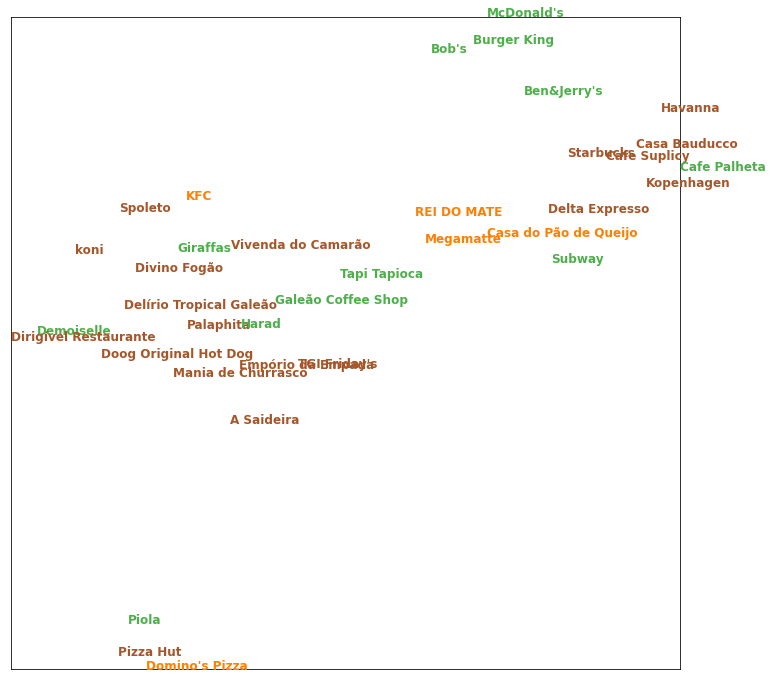

In [0]:
from sklearn.manifold import TSNE
# X = w2v_for_each_restaurant
X = pd.read_csv("tf_idf_values.csv")
rating = pd.read_csv("lratings_w2v.csv")
co = rating['0']
# X = whole
X_tsne = TSNE(n_components=2,perplexity=5,n_iter=100000,early_exaggeration=70,learning_rate=10,method="exact").fit_transform(X)
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)
y = reviews["restaurant"]
plt.figure(figsize=(12, 12))
for i in range(X_norm.shape[0]):
  plt.text(X_norm[i, 0], X_norm[i, 1], y[i], color=plt.cm.Set1(co[i]+1), 
             fontdict={'weight': 'bold', 'size': 12})
plt.xticks([])
plt.yticks([])
plt.show()

Classify restaurants based on the whole reviews

<Figure size 864x864 with 0 Axes>

Text(0.011279198, 0.46296546, 'A Saideira')

Text(0.8895973, 0.5907313, "Ben&Jerry's")

Text(0.17121273, 0.21270089, "Bob's")

Text(0.31921923, 0.14031036, 'Burger King')

Text(0.3112562, 0.36583138, 'Cafe Suplicy')

Text(1.0, 0.7993763, 'Cafe Palheta')

Text(0.33909202, 0.2867893, 'Casa do Pão de Queijo')

Text(0.8864351, 0.7367113, 'Doog Original Hot Dog')

Text(0.23437934, 0.669475, 'Delírio Tropical Galeão')

Text(0.65294945, 0.6710456, 'Empório da Empada')

Text(0.68017966, 0.758588, 'Demoiselle')

Text(0.6205128, 0.56192464, 'Galeão Coffee Shop')

Text(0.5235234, 0.26315898, 'Giraffas')

Text(0.33621082, 0.7197835, 'Havanna')

Text(0.50484186, 0.4394007, 'koni')

Text(0.31328836, 0.012941218, "McDonald's")

Text(0.56871384, 0.90066874, 'Palaphita')

Text(0.042962246, 0.6089654, 'Piola')

Text(0.95172495, 0.78818536, 'REI DO MATE')

Text(0.48062697, 0.35497177, 'Spoleto')

Text(0.19300838, 0.30931053, 'Starbucks')

Text(0.23728412, 0.0, 'Subway')

Text(0.6812679, 1.0, 'Mania de Churrasco')

Text(0.043536857, 0.4143694, "TGI Friday's")

Text(0.12600565, 0.69066447, 'Tapi Tapioca')

Text(0.6730323, 0.8744272, 'Pizza Hut')

Text(0.7533587, 0.81337035, 'Divino Fogão')

Text(0.59859014, 0.82182497, 'Vivenda do Camarão')

Text(0.5740602, 0.20189455, 'KFC')

Text(0.51811874, 0.97708976, 'Megamatte')

Text(0.0, 0.6452854, 'Harad')

Text(0.23630592, 0.5756779, 'Delta Expresso')

Text(0.40409377, 0.26043698, "Domino's Pizza")

Text(0.93091774, 0.5972172, 'Kopenhagen')

Text(0.40724662, 0.4252511, 'Casa Bauducco')

Text(0.5322948, 0.74544203, 'Dirigível Restaurante')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

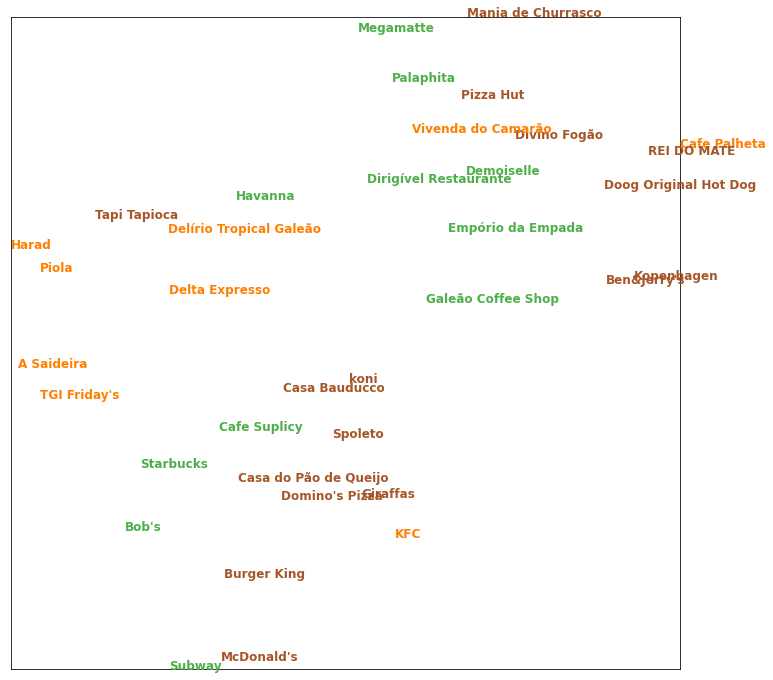

In [0]:
# X = w2v_for_each_restaurant
X = whole
X_tsne = TSNE(n_components=2,perplexity=5,n_iter=100000,early_exaggeration=60,learning_rate=10,method="exact",init="pca").fit_transform(X)
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)
y = reviews["restaurant"]
rating = pd.read_csv("lratings_w2v.csv")
co = rating['0']
plt.figure(figsize=(12, 12))
for i in range(X_norm.shape[0]):
  plt.text(X_norm[i, 0], X_norm[i, 1], y[i], color=plt.cm.Set1(co[i]+1), 
             fontdict={'weight': 'bold', 'size': 12})
plt.xticks([])
plt.yticks([])
plt.show()

Classify restaurants based on the features we extracted

<Figure size 864x864 with 0 Axes>

Text(0.36566424, 0.89877784, 'A Saideira')

Text(0.62250656, 0.6097134, "Ben&Jerry's")

Text(0.0027526473, 0.71786845, "Bob's")

Text(0.0, 0.67597044, 'Burger King')

Text(0.34042573, 0.57228696, 'Cafe Suplicy')

Text(0.34222072, 1.0, 'Cafe Palheta')

Text(0.3290724, 0.6197598, 'Casa do Pão de Queijo')

Text(0.6652859, 0.52132595, 'Doog Original Hot Dog')

Text(0.6582596, 0.0, 'Delírio Tropical Galeão')

Text(0.57950747, 0.34151378, 'Empório da Empada')

Text(0.67926323, 0.31910592, 'Demoiselle')

Text(0.39440006, 0.31559908, 'Galeão Coffee Shop')

Text(0.3174625, 0.15051821, 'Giraffas')

Text(1.0, 0.3972689, 'Havanna')

Text(0.25553307, 0.91344196, 'koni')

Text(0.043195475, 0.7695997, "McDonald's")

Text(0.8091171, 0.12597936, 'Palaphita')

Text(0.3858046, 0.12752426, 'Piola')

Text(0.41644514, 0.5287724, 'REI DO MATE')

Text(0.20172009, 0.8787245, 'Spoleto')

Text(0.19480047, 0.54607683, 'Starbucks')

Text(0.26094407, 0.68056685, 'Subway')

Text(0.69831717, 0.36881426, 'Mania de Churrasco')

Text(0.31916144, 0.22262532, "TGI Friday's")

Text(0.81371725, 0.06156077, 'Tapi Tapioca')

Text(0.78908217, 0.38802907, 'Pizza Hut')

Text(0.63129526, 0.038849525, 'Divino Fogão')

Text(0.7520055, 0.17930597, 'Vivenda do Camarão')

Text(0.43495646, 0.070602074, 'KFC')

Text(0.89631337, 0.39254135, 'Megamatte')

Text(0.29355925, 0.3332181, 'Harad')

Text(0.2751739, 0.075990655, 'Delta Expresso')

Text(0.4333712, 0.90874046, "Domino's Pizza")

Text(0.23474233, 0.9809324, 'Kopenhagen')

Text(0.5925052, 0.57060206, 'Casa Bauducco')

Text(0.7059928, 0.2307151, 'Dirigível Restaurante')

([], <a list of 0 Text major ticklabel objects>)

([], <a list of 0 Text major ticklabel objects>)

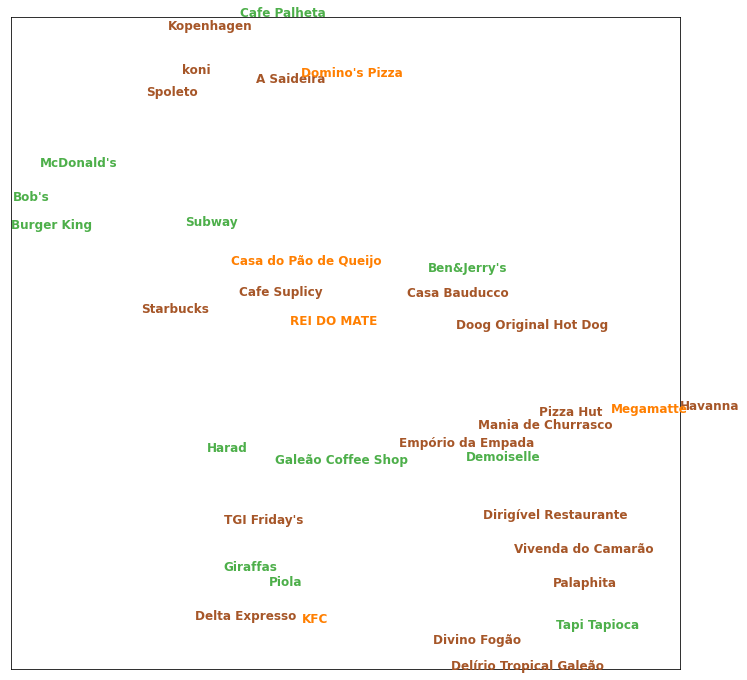

In [0]:
X = w2v_for_each_restaurant
# X = whole
X_tsne = TSNE(n_components=2,perplexity=5,n_iter=100000,early_exaggeration=70,learning_rate=10,method="exact").fit_transform(X)
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)
y = reviews["restaurant"]
rating = pd.read_csv("lratings_w2v.csv")
co = rating['0']
plt.figure(figsize=(12, 12))
for i in range(X_norm.shape[0]):
  plt.text(X_norm[i, 0], X_norm[i, 1], y[i], color=plt.cm.Set1(co[i]+1), 
             fontdict={'weight': 'bold', 'size': 12})
plt.xticks([])
plt.yticks([])
plt.show()

# Models

In [0]:
from joblib import dump

In [0]:
rating = pd.read_csv("lratings_w2v.csv")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=w2v_for_each_restaurant
y=rating
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=3,shuffle=True)

In [0]:
X_train

[array([-12.8525355 ,   4.65656177,   3.24255017,  12.64808631,
         -9.42715817,   3.73944244,  -8.3605513 ,  14.97383838,
         -3.38766767,  11.75731497, -12.86450418,  -2.60143193,
          2.25354236,   0.56500749, -11.30630364,  -7.79517907,
         -2.36081213,   3.67846532,  -2.76508339,  24.45330726,
          8.5464085 ,  21.32011737, -19.99493776, -25.24692823,
         -8.16505243,   4.84828895,  -0.40049536,   4.34897384,
         -3.68132786, -11.5058199 ,  -9.46838218, -11.24270207,
         -9.00907029,  -4.41726743,   8.11361319, -16.49678538,
         -3.56153503,  -8.35753095,   8.36099733,   0.28092696,
         -5.84247858,   4.23631304,  -0.23990812,  -7.10407104,
         -1.425313  ,  -0.53948615, -12.74568172,  23.97821706,
         -1.1541067 ,   6.4104386 ,  15.75619702,   8.09946256,
         -2.82710906, -13.26572644,   9.80791589,   4.13554669,
         -1.77801333,  -0.33778747,   7.59258241,   3.96252047,
         -2.16868787,   1.10999257,  -5.

## SVM

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#adjust parameters
model = SVC(kernel='rbf', probability=True)    
param_grid = {'kernel':['rbf','linear','poly'],'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001,0.1,0.5]}    
grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)    
grid_search.fit(X_train, y_train)    
best_parameters = grid_search.best_estimator_.get_params()    
for para, val in list(best_parameters.items()):    
    print(para, val)    
svm = SVC(kernel=best_parameters['kernel'], C=best_parameters['C'], gamma=best_parameters['gamma'],probability=True)

#train SVM model
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
dump(svm, 'svm_try.joblib')
# clf = load('filename.joblib')

Fitting 5 folds for each of 84 candidates, totalling 420 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 420 out of 420 | elapsed:    1.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.0001, 0.1, 0.5],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

C 10
break_ties False
cache_size 200
class_weight None
coef0 0.0
decision_function_shape ovr
degree 3
gamma 0.001
kernel rbf
max_iter -1
probability True
random_state None
shrinking True
tol 0.001
verbose False


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

['svm_best.joblib']

In [0]:
print("Test accuracy",accuracy_score(y_test, y_pred))

Test accuracy 0.75


In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ['Bad','Medium','Good']

y_true = y_test
y_pred = y_pred

tick_marks = np.array(range(len(labels))) + 0.5

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print (cm_normalized)
plt.figure(figsize=(12, 8), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
#     if c > 0.01:
    plt.text(x_val, y_val, "%0.2f" % (c,), color='grey', fontsize=12, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
# show confusion matrix
plt.savefig('/content/svm_confusion_matrix.png', format='png')

[[1.  0.  0. ]
 [0.  0.  1. ]
 [0.2 0.  0.8]]


<Figure size 1440x960 with 0 Axes>

Text(0, 0, '1.00')

Text(1, 0, '0.00')

Text(2, 0, '0.00')

Text(0, 1, '0.00')

Text(1, 1, '0.00')

Text(2, 1, '1.00')

Text(0, 2, '0.20')

Text(1, 2, '0.00')

Text(2, 2, '0.80')

<Figure size 432x288 with 0 Axes>

## Logistics Regression

In [0]:
#logistic regresssion
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#adjust parameters
model = LogisticRegression(random_state=0)
param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'penalty': ['l1','l2']}    
grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)    
grid_search.fit(X_train, y_train)    
best_parameters = grid_search.best_estimator_.get_params()    
for para, val in list(best_parameters.items()):    
    print(para, val)   
lr = LogisticRegression( C=best_parameters['C'], penalty=best_parameters['penalty'])
#train LR model
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
dump(lr,"lr_try.joblib")

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    1.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessin

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

C 0.01
class_weight None
dual False
fit_intercept True
intercept_scaling 1
l1_ratio None
max_iter 100
multi_class auto
n_jobs None
penalty l2
random_state 0
solver lbfgs
tol 0.0001
verbose 0
warm_start False


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

['lr_try.joblib']

In [0]:
print('Test accuracy',accuracy_score(y_test, y_pred_lr))

Test accuracy 0.875


In [0]:
cm = confusion_matrix(y_test, y_pred_lr)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print (cm_normalized)
plt.figure(figsize=(12, 8), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
#     if c > 0.01:
    plt.text(x_val, y_val, "%0.2f" % (c,), color='grey', fontsize=12, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
# show confusion matrix
plt.savefig('/content/lg_confusion_matrix.png', format='png')

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


<Figure size 1440x960 with 0 Axes>

Text(0, 0, '1.00')

Text(1, 0, '0.00')

Text(2, 0, '0.00')

Text(0, 1, '1.00')

Text(1, 1, '0.00')

Text(2, 1, '0.00')

Text(0, 2, '0.00')

Text(1, 2, '0.00')

Text(2, 2, '1.00')

<Figure size 432x288 with 0 Axes>

## Bayes

In [0]:
import sklearn.naive_bayes as nb
bayes = nb.GaussianNB()
bayes.fit(X_train, y_train)
pred=bayes.predict(X_test)
print('Test accuracy',accuracy_score(y_test, pred))
# dump(lr,"bayes.joblib")

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

Test accuracy 0.75


[[1.  0.  0. ]
 [1.  0.  0. ]
 [0.2 0.  0.8]]


<Figure size 1440x960 with 0 Axes>

Text(0, 0, '1.00')

Text(1, 0, '0.00')

Text(2, 0, '0.00')

Text(0, 1, '1.00')

Text(1, 1, '0.00')

Text(2, 1, '0.00')

Text(0, 2, '0.20')

Text(1, 2, '0.00')

Text(2, 2, '0.80')

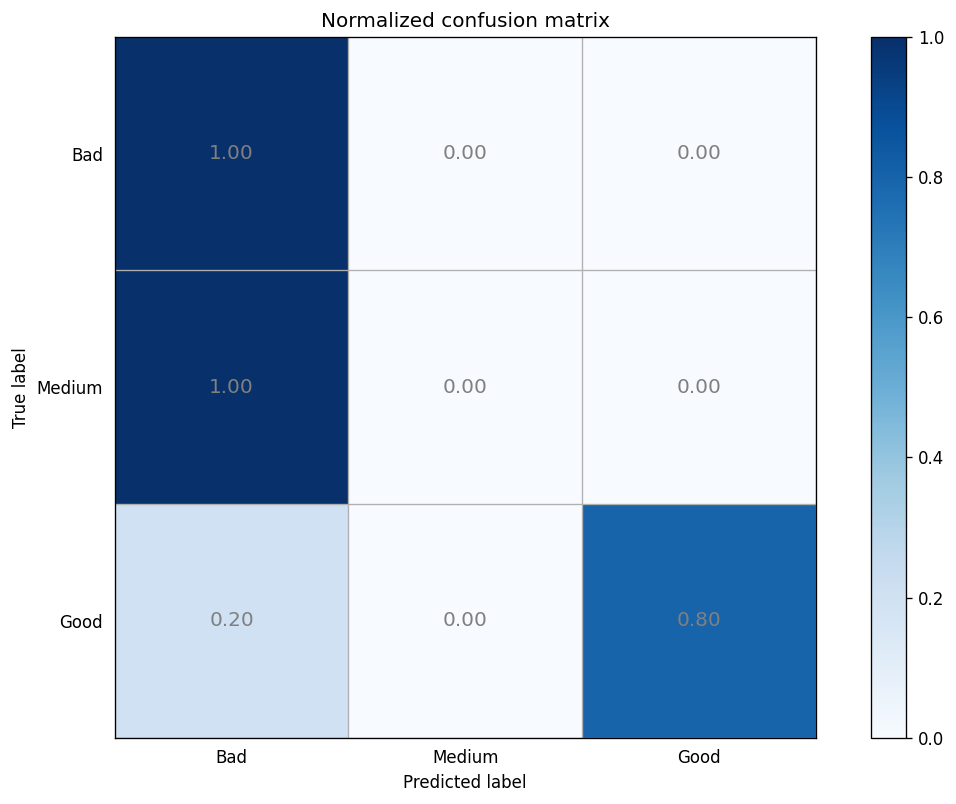

<Figure size 432x288 with 0 Axes>

In [0]:
cm = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print (cm_normalized)
plt.figure(figsize=(12, 8), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
#     if c > 0.01:
    plt.text(x_val, y_val, "%0.2f" % (c,), color='grey', fontsize=12, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
# show confusion matrix
plt.savefig('/content/bayes_matrix.png', format='png')

## CNN

In [0]:
# from gensim.models.word2vec import Word2Vec
# model = Word2Vec(sentences, size=128, window=5, min_count=5, workers=4)

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape[0]
X_train.shape[1]
X_train.shape[2]
x_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1],  X_train.shape[2])
x_test = X_test.reshape(X_test.shape[0], 1,  X_train.shape[1],  X_train.shape[2])

28

149

300

In [0]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train -= mean
x_test -= mean
x_train /= std
x_test /= std

In [0]:
import keras.backend.tensorflow_backend as tfback
import tensorflow as tf
def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus

In [0]:
tf.config.experimental.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [0]:
#CNN
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.optimizers import Adam, SGD
# set parameters:
batch_size = 16
n_filter = 10
filter_length = 5
nb_epoch = 100
n_pool = 4
num_feature = 149
vector_size = 300


# build sequential model
model = Sequential()
model.add(Convolution2D(n_filter,filter_length,padding='same',
                        input_shape=(1, num_feature, vector_size),data_format = 'channels_first'))
model.add(Activation('relu'))
model.add(Convolution2D(n_filter,filter_length,filter_length))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
# model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))
# compile model
# model.compile(loss='mse',
#               optimizer='adadelta',
#               metrics=['accuracy'])
# model.compile(optimizer='SDG',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-6)	
# optimizer = get_optimizer('SGD')# Choice : SGD, RMSprop, Adadelta, Adam, Adamax, Nadam
optimizer = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer= optimizer, loss='binary_crossentropy',
                          metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='accuracy', patience=6, verbose=1,
                                          mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='accuracy', factor=0.1,
                                               patience=3, verbose=1, epsilon=1e-4,
                                               mode='max')

model.summary()
model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1,callbacks=[reduce_lr_loss,earlyStopping])
score = model.evaluate(x_test, y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
model.save("cnn.h5")

## Combine part

In [0]:
from joblib import load
svm_best = load("svm_best.joblib")
lr_best = load("lr_best.joblib")
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
estimators=[('SVC', svm_best), ('LR', lr_best)]

In [0]:
ensemble = VotingClassifier(estimators, voting='soft',weights=[0.5,1])
ensemble.fit(X_train, y_train)
e_pred = ensemble.predict(X_test)
print('Test accuracy',accuracy_score(y_test,e_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

VotingClassifier(estimators=[('SVC',
                              SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.001, kernel='rbf', max_iter=-1,
                                  probability=True, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('LR',
                              LogisticRegression(C=0.01, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                         

Test accuracy 0.875


In [0]:
ensemble = StackingClassifier(estimators,final_estimator=LinearSVC(random_state=44))
ensemble.fit(X_train, y_train)
e_pred = ensemble.predict(X_test)
print('Test accuracy',accuracy_score(y_test,e_pred))

In [0]:
cm = confusion_matrix(y_test, e_pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print (cm_normalized)
plt.figure(figsize=(12, 8), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
#     if c > 0.01:
    plt.text(x_val, y_val, "%0.2f" % (c,), color='grey', fontsize=12, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
# show confusion matrix
plt.savefig('/content/combine_matrix.png', format='png')

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


<Figure size 1440x960 with 0 Axes>

Text(0, 0, '1.00')

Text(1, 0, '0.00')

Text(2, 0, '0.00')

Text(0, 1, '1.00')

Text(1, 1, '0.00')

Text(2, 1, '0.00')

Text(0, 2, '0.00')

Text(1, 2, '0.00')

Text(2, 2, '1.00')

<Figure size 432x288 with 0 Axes>

# Suggestion Part

In [0]:
from joblib import load
from keras.models import load_model

In [0]:
cmodel = load_model('cnn.h5')
cmodel

In [0]:
# Load our word2vec model
import gensim
num_features = 300
w2v_model = gensim.models.word2vec.Word2Vec.load("word2vec_model_trained_on_yelp_review"+str(num_features)+".w2v")
print("Model loaded")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model loaded


In [0]:
import numpy as np
other_restaurants =[]
rs = []
with open("brazil_reviews.txt","r") as f:
    for line in f.readlines():
        if len(line) >0:
            sum_w2v = np.zeros(num_features,dtype=float)
            r, c = line.split(",")
            for w in c.split(" "):
                if w in w2v_model:
                    sum_w2v += w2v_model[w]
            rs.append(r)
            other_restaurants.append(np.array(sum_w2v))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [0]:
other_restaurants

In [0]:
lr = load("lr_best.joblib")
lr_recommend=lr.predict(other_restaurants)
lr_recommend

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

In [0]:
import json
suggest=dict()
for i in range(len(rs)):
    suggest[rs[i]]=str(lr_recommend[i])
with open('recommend_restaurants_r.json', 'w') as outfile:  
    json.dump(suggest, outfile)

suggests=dict()
for i in range(len(rs)):
    if lr_recommend[i]==5:
        suggests[rs[i]]='Good'
    elif lr_recommend[i]==3:
        suggests[rs[i]]='Medium'
    else:
        suggests[rs[i]]='Bad'
with open('recommend_restaurants_l.json', 'w') as outfile:  
    json.dump(suggests, outfile)

In [0]:
import json
import json
import csv
import codecs
f = open('recommend_restaurants_l.json')
data = json.load(f)
f.close()
data

{'Aprazível': 'Good',
 'Bacio di Latte': 'Bad',
 'Bar Astor': 'Good',
 'Bar Urca': 'Good',
 'Bar do David': 'Good',
 'Beco do Hamburguer': 'Good',
 'Braseiro': 'Good',
 'Brownieria': 'Good',
 'Churrascaria Carretão': 'Good',
 'Churrascaria Palace': 'Good',
 'Coco Bambu': 'Good',
 'Comuna': 'Good',
 'Confeitaria Majestosa': 'Good',
 'Domenica Pizzaria Artesanal': 'Good',
 'Fogo de Chão Botafogo': 'Good',
 'Galeto & Cia.': 'Good',
 'Garota de Ipanema': 'Good',
 'Império Gourmet': 'Good',
 'Irajá Gastrô': 'Good',
 'Jóia Carioca': 'Good',
 'La Mole - Tijuca': 'Good',
 'La Paleta': 'Good',
 "La' Palma": 'Good',
 'Mamma Jamma': 'Good',
 'Na Brasa Columbia': 'Medium',
 'Nam Thai': 'Good',
 'Nikkei Brasília': 'Good',
 'Nomangue': 'Good',
 'Oia': 'Good',
 'Olivia Saladas': 'Good',
 'Olympe': 'Good',
 'Ousadia Restaurante e Pizzaria': 'Good',
 'Outback': 'Good',
 'Pizzas Dom Bosco': 'Good',
 'Pão & Companhia Copacabana': 'Good',
 'Rancho Português': 'Good',
 'Restaurante Leite': 'Good',
 'Restau

In [0]:
with open('/content/suggest.csv', 'w') as f:  
    for i in data:
        f.write(i+','+data[i]+'\n')